In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

cmap = plt.cm.tab20c
cmap_c = [cmap(1),cmap(5),cmap(9),cmap(13),cmap(17)]

%matplotlib inline

## Data loading

In [2]:
af = pd.read_csv('/Users/bryanmolina/Documents/Draft Day Prep/workspace/Python/Spotify Audio Analysis/artist_dataset.csv')
print(af.shape)
af.head()

(347, 17)


,Unnamed: 0,track,album,artist,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,key,mode,time_signature
0,00ogmsZiK6dB0QVUDBeehZ,Soliloquy,Cilvia Demo,Isaiah Rashad,0.361,0.793,-2.008,0.0507,0.0111,0.0000,0.223,0.314,76.082,106463,0,1,4
1,01wKeKPgYxdPYA8rfMveYc,Shot You Down (feat. Jay Rock & ScHoolboy Q),Cilvia Demo,Isaiah Rashad,0.682,0.717,-3.682,0.2460,0.3850,0.0000,0.152,0.507,90.147,426997,1,1,4
2,0Gt4nGWoATcQFL38a1NRao,West Savannah (feat. SZA),Cilvia Demo,Isaiah Rashad,0.652,0.906,-4.032,0.1610,0.1300,0.0681,0.504,0.559,125.103,167277,9,1,4
3,0SC6bK22QGoX8EdgFM13Gv,Hereditary,Cilvia Demo,Isaiah Rashad,0.533,0.743,-6.671,0.0959,0.8710,0.8470,0.759,0.743,97.544,86587,1,0,4
4,0qLt7pQhm8LDxFgI0YXdlY,Heavenly Father,Cilvia Demo,Isaiah Rashad,0.608,0.676,-7.560,0.2480,0.2120,0.0000,0.347,0.570,80.939,260632,1,1,4


In [3]:
af.set_index(af.columns[0],inplace=True,drop=True)
af.index.name = 'id'

## Stats

A quick overview before exploring later.

In [4]:
#categorical stats
af.describe(include=['O'])

,track,album,artist
count,347,347,347
unique,343,24,5
top,Intro,Born Sinner,Kendrick Lamar
freq,5,20,96


In [5]:
#numerical stats
af.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,key,mode,time_signature
count,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,0.637928,0.658617,-7.534115,0.253107,0.261275,0.005759,0.246553,0.436864,116.508473,243227.792507,5.331412,0.530259,3.948127
std,0.138546,0.157838,2.555338,0.142803,0.245341,0.048830,0.175840,0.197650,31.108960,85742.903912,3.755107,0.499804,0.413173
min,0.300000,0.121000,-21.487000,0.031300,0.000282,0.000000,0.053700,0.042900,60.019000,36667.000000,0.000000,0.000000,1.000000
25%,0.534000,0.545500,-8.708500,0.135000,0.060600,0.000000,0.114500,0.296500,87.418500,208086.500000,1.000000,0.000000,4.000000
50%,0.634000,0.667000,-7.181000,0.250000,0.185000,0.000000,0.181000,0.427000,116.012000,235320.000000,6.000000,1.000000,4.000000
75%,0.739500,0.783000,-5.809500,0.346000,0.391000,0.000015,0.325000,0.585500,140.047500,277633.500000,8.000000,1.000000,4.000000
max,0.959000,0.949000,-2.008000,0.879000,0.936000,0.847000,0.814000,0.966000,192.157000,875307.000000,11.000000,1.000000,5.000000


## Sample Errors

Spotify lists Rap audio feature averages for instrumentalness and speechiness. It's safe to assume that these averages are based on the rap population. Let's look at the sampling error for those audio features.

## Dataset makeup

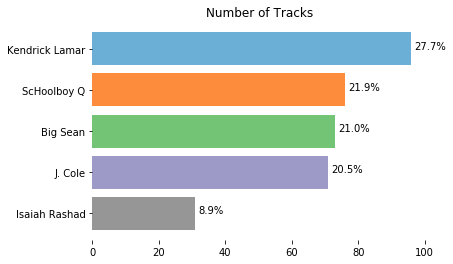

In [6]:
#table setup
value_counts = af['artist'].value_counts()
artists = list(value_counts.index)
num_tracks = value_counts.values
y_pos = np.arange(len(artists))

#plot creation & appearance
fig, ax = plt.subplots()
ax.barh(y_pos,num_tracks,align='center',color=cmap_c)
ax.set_yticks(y_pos)
ax.set_yticklabels(artists)
ax.invert_yaxis()
ax.set_frame_on(False)
ax.set_title('Number of Tracks')

#percent annotations
pcts = round((value_counts / sum(value_counts)) * 100,1)
for pos, artist in enumerate(pcts.index):
    score = value_counts[artist] + 1
    label = str(pcts[artist]) + '%'
    ax.annotate(label,(score,pos))

## Most Common Audio Features

The last describe() table gives an interesting point to start from and can be summarized by these questions: What exactly about these artist is it that interest me? What is that these artist share most in common? One way of answering this from a statistical standpoint is by looking at the standard deviation. The standard deviation measures how different are values from the mean, the closer to 0 the more similar values are to the mean. By looking at the standard deviation we can see which audio features are the most common amongst all tracks. This will give us an insight into what about the music is it I'm drawn to. Let's look at the top 5 with the accompanying mean for each feature

In [7]:
af.describe().T.loc[:,['std','mean']].sort_values(by='std')

,std,mean
instrumentalness,0.048830,0.005759
danceability,0.138546,0.637928
speechiness,0.142803,0.253107
energy,0.157838,0.658617
liveness,0.175840,0.246553
valence,0.197650,0.436864
acousticness,0.245341,0.261275
time_signature,0.413173,3.948127
mode,0.499804,0.530259
loudness,2.555338,-7.534115


Sorted by increasing Standard Deviation: 
1. Instrumentalness
2. Danceability
3. Speechiness
4. Energy
5. Liveness

While standard deviation will describe which audio features are most common amongst all tracks, the mean will describe the average portrayal of that audio feature amongst all. The descriptions below will help us decipher exactly what is defined by each mean value. **Boxplots are provided below if you want to avoid the detailed analysis.**

Let's remember that our dataset is only a sample and not a population. The suggested thresholds within the descriptions are most likely based on Spotify's population, which  contains tons of more data points and variability than ours.


* **Instrumentalness** : *Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.*


* **Danceability** : *Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.*


* **Speechiness** : *Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.*


* **Energy** : *Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.*


* **Liveness** : *Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.*

Taking into account the mean values and descriptions of each audio feature there isn't anything too suprising about the music collection as a whole. Being as the entirety of it is Hip Hop/Rap we would expect the **Intrumentalness** value (*0.006*) to be fairly low. I did find a **Danceability** score of *0.64* interesting though. Yes, Hip Hop/Rap does include influence and instruments from a variety of cultures and genres such as jazz, blues, funk, salsa, and disco many of which I would describe as highly danceable. Although I would say I did not expect such a high value from knowing these artist and their styles. Many of them are recongized as Rap's elite lyricist. **Speechiness** (*0.25*) is another interesting value because of the fact that it scored below the believed range of rap music (*0.33 - 0.66*) and instead is described as non-speech-like. A stat's course will of told us to expect the *sample standard deviation* to be below the *population standard deviation* but being as this is a very telling characteristic of the artist it'll be interesting to investigate which artist are truer to the mean. With a standard deviation of *0.14* the music isn't too varied from the mean but worth further investigating since it's not what we would expect from elite lyricist. Similarly, a relatively high **Energy** value *0.66* can be expected as intensity, feeling fast, loud, and noisy are very much characteristics of Hip Hop/Rap. Lastly, **Liveness** (*0.25*) is as expected below the 0.8 threshold since all tracks are studio recordings.

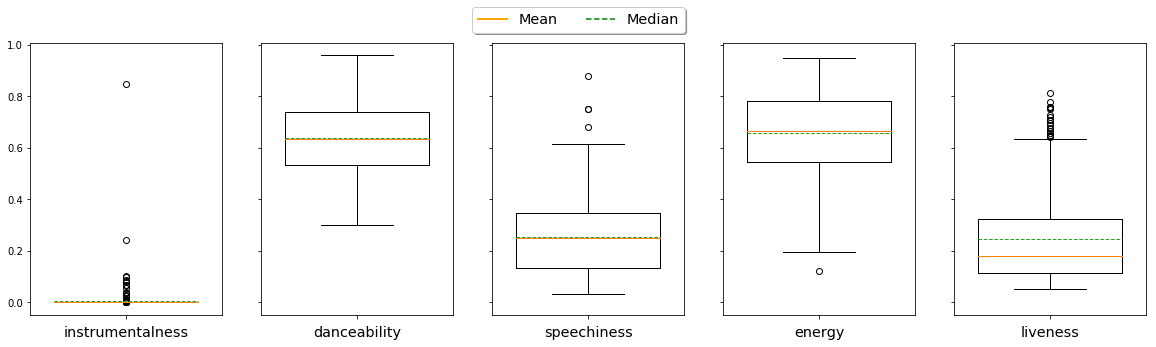

In [8]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(20,5),sharey=True)

#legend lines
mean_line = Line2D([0],[0], color = 'Orange', lw=2)
median_line = Line2D([0],[0], color = "Green", ls='dashed')

ax1.boxplot(af['instrumentalness'],labels=[''],meanline=True,showmeans=True)
ax1.set_xlabel('instrumentalness',fontsize='x-large')
ax1.set_xlim(.9,1.1)

ax2.boxplot(af['danceability'],labels=[''],meanline=True,showmeans=True)
ax2.set_xlabel('danceability',fontsize='x-large')
ax2.set_xlim(.9,1.1)

ax3.boxplot(af['speechiness'],labels=[''],meanline=True,showmeans=True)
ax3.set_xlabel('speechiness',fontsize='x-large')
ax3.set_xlim(.9,1.1)

ax4.boxplot(af['energy'],labels=[''],meanline=True,showmeans=True)
ax4.set_xlabel('energy',fontsize='x-large')
ax4.set_xlim(.9,1.1)

ax5.boxplot(af['liveness'],labels=[''],meanline=True,showmeans=True)
ax5.set_xlabel('liveness',fontsize='x-large')
ax5.set_xlim(.9,1.1)

plt.figlegend(handles = (mean_line,median_line),labels=['Mean', 'Median'], loc = 'upper center', ncol=2, fontsize='x-large',shadow=True)

Although instrumentalness and liveness contain many high-value outliers, respectively, referencing the describe() table produced earlier we can guarantee that high-value outliers make up less than 25% of each respective column.  It would be interesting to view the exact percentage of outliers and the artists behind them. To do so we'll set the top whisker as our threshold value and view tracks greater than that value.

In [9]:
in_top_whisker = ax3.boxplot(af['instrumentalness'],labels=[''],meanline=True,showmeans=True)['whiskers'][1].get_ydata()[1]
live_top_whisker = ax3.boxplot(af['liveness'],labels=[''],meanline=True,showmeans=True)['whiskers'][1].get_ydata()[1]

Interesting area but the presence and removal of outliers in instrumentalness will not affect the mean. It'll only be closer to zero

## Instrumentalness Outliers

In [10]:
#instrumentalness outlier data
cols = ['artist','instrumentalness']

in_outliers = af.loc[af['instrumentalness'] > in_top_whisker,cols]
in_outliers_grouped = in_outliers.groupby('artist').agg({'instrumentalness':'mean','artist':'count'})
in_outliers_grouped.columns = ['mean','count']
in_outliers_grouped['pct_count'] = in_outliers_grouped['count'] / sum(in_outliers_grouped['count'])

in_outliers_grouped = in_outliers_grouped.sort_values('count',ascending=False)

Text(0.5, 1.0, 'Instrumentalness Averages')

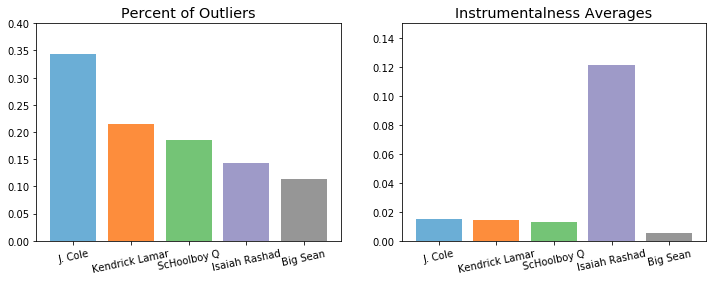

In [13]:
#instrumentalness outlier plot
x_coords = np.arange(len(in_outliers_grouped.index))
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

#percentages plot
ax1.bar(x = x_coords, height = in_outliers_grouped['pct_count'],
        tick_label=[''], color = cmap_c
       )
ax1.set_ylim(0,0.4)
ax1.set_xticklabels(in_outliers_grouped.index,rotation=12)
ax1.set_title('Percent of Outliers',fontdict={'fontsize':'x-large'})

#means plot
ax2.bar(x = x_coords, height = in_outliers_grouped['mean'],
        tick_label=[''], color = cmap_c
       )
ax2.set_ylim(0,0.15)
ax2.set_xticklabels(in_outliers_grouped.index,rotation=12)
ax2.set_title('Instrumentalness Averages',fontdict={'fontsize':'x-large'})

In [14]:
in_pct_total = sum(in_outliers_grouped['count']) / af.shape[0]
print('Percent of Total - Instrumentalness Outliers: {}'.format(round(in_pct_total * 100,2)))

Percent of Total - Instrumentalness Outliers: 20.17


## Liveness Outliers

In [15]:
#liveness outlier data
cols = ['artist','liveness']

live_outliers = af.loc[af['liveness'] > live_top_whisker,cols]
live_outliers_grouped = live_outliers.groupby('artist').agg({'liveness':'mean','artist':'count'})
live_outliers_grouped.columns = ['mean','count']
live_outliers_grouped['pct_count'] = live_outliers_grouped['count'] / sum(live_outliers_grouped['count'])

live_outliers_grouped = live_outliers_grouped.sort_values('count',ascending=False)

Text(0.5, 1.0, 'Liveness Averages')

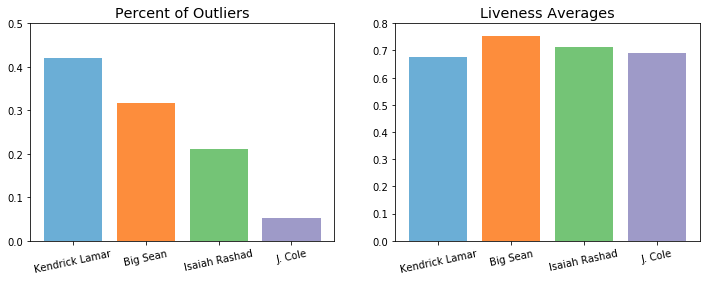

In [16]:
#instrumentalness outlier plot
x_coords = np.arange(len(live_outliers_grouped.index))
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

#percentages plot
ax1.bar(x = x_coords, height = live_outliers_grouped['pct_count'],
        tick_label=[''], color = cmap_c
       )
ax1.set_ylim(0,0.5)
ax1.set_xticklabels(live_outliers_grouped.index,rotation=12)
ax1.set_title('Percent of Outliers',fontdict={'fontsize':'x-large'})

#means plot
ax2.bar(x = x_coords, height = live_outliers_grouped['mean'],
        tick_label=[''], color = cmap_c
       )
ax2.set_ylim(0,0.8)
ax2.set_xticklabels(live_outliers_grouped.index,rotation=12)
ax2.set_title('Liveness Averages',fontdict={'fontsize':'x-large'})

In [17]:
in_pct_total = sum(live_outliers_grouped['count']) / af.shape[0]
print('Percent of Total - Liveness Outliers: {}'.format(round(in_pct_total * 100,2)))

Percent of Total - Liveness Outliers: 5.48


## Examining Correlations

In [19]:
af.corr()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,key,mode,time_signature
danceability,1.000000,-0.178592,0.086406,-0.145153,-0.194703,-0.039427,-0.197335,0.161817,0.070150,-0.040805,-0.006798,0.062659,0.087281
energy,-0.178592,1.000000,0.706151,0.055261,-0.241635,-0.020053,0.126890,0.275433,0.085696,0.051251,-0.031783,-0.003644,0.065506
loudness,0.086406,0.706151,1.000000,-0.067014,-0.355345,-0.049253,0.025175,0.201568,0.097472,0.099533,-0.065061,0.137636,0.104375
speechiness,-0.145153,0.055261,-0.067014,1.000000,0.184510,-0.100467,0.125948,0.083859,0.033875,0.097642,0.075747,0.005838,0.011738
acousticness,-0.194703,-0.241635,-0.355345,0.184510,1.000000,0.116610,0.073896,0.023351,-0.144019,-0.108938,0.071565,-0.055071,-0.178732
instrumentalness,-0.039427,-0.020053,-0.049253,-0.100467,0.116610,1.000000,0.151588,0.036398,-0.017500,-0.118707,-0.043632,-0.067053,0.006727
liveness,-0.197335,0.126890,0.025175,0.125948,0.073896,0.151588,1.000000,0.035009,0.027148,0.031028,-0.030757,-0.008051,0.070549
valence,0.161817,0.275433,0.201568,0.083859,0.023351,0.036398,0.035009,1.000000,0.079476,-0.122167,0.077974,-0.040654,-0.047168
tempo,0.070150,0.085696,0.097472,0.033875,-0.144019,-0.017500,0.027148,0.079476,1.000000,-0.062944,-0.028834,0.016083,0.109045
duration_ms,-0.040805,0.051251,0.099533,0.097642,-0.108938,-0.118707,0.031028,-0.122167,-0.062944,1.000000,0.029012,0.021190,0.161894


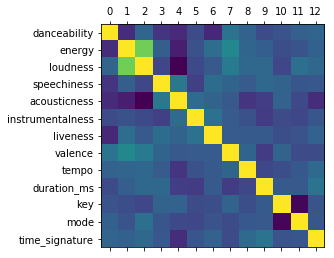

In [28]:
af_numerics = af.iloc[:,3:]
plt.matshow(af_numerics.corr())
plt.xticks(np.arange(af_numerics.shape[1]))
plt.yticks(np.arange(af_numerics.shape[1]),list(af_numerics.columns))
plt.show()

In [ ]:
def contains_feature(track):
    if 'feat' in track:
        return True
    return False

features = collection['track'].apply(contains_feature)

## Danceability

In [ ]:
cols = ['danceability','energy','speechiness','acousticness']
fig, ax = plt.subplots()

ax.boxplot(collection[cols].values)
ax.set_title('Danceability')
ax.set_xticklabels(cols)


plt.show()

In [ ]:
collection[cols].values